In [11]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.activations import elu

In [3]:
num_classes = 20
img_rows, img_cols = 32, 32
batch_size = 16

train_dir = "simpsons/train/"
validation_dir = "simpsons/validation/"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.3, height_shift_range=0.3, 
                                   horizontal_flip=True, fill_mode="nearest")
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_cols, img_rows), batch_size=batch_size,
                                                   class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(img_cols, img_rows), 
                                                              batch_size=batch_size, class_mode="categorical")

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [16]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding="same", input_shape=(img_cols, img_rows, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)       

In [22]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [23]:
checkpoint = ModelCheckpoint("little_vgg.h5", monitor="val_loss", mode="min", save_best_only=True, verbose=1)

early_stop = EarlyStopping(monitor="val_loss", patience=3, min_delta=0, verbose=1, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, verbose=1, min_delta=0.00001)

callbacks = [checkpoint, early_stop, reduce_lr]

In [24]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])

In [25]:
nb_train_samples = 19548
nb_val_samples = 990
epochs = 10

In [26]:
history = model.fit_generator(train_generator, steps_per_epoch=nb_train_samples//batch_size, epochs=epochs, 
                              callbacks=callbacks,
                             validation_data=validation_generator, validation_steps=nb_val_samples//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1221/1221 [==============================] - ETA: 0s - loss: 2.8565 - accuracy: 0.1595
Epoch 00001: val_loss improved from inf to 2.93807, saving model to little_vgg.h5
1221/1221 [==============================] - 512s 419ms/step - loss: 2.8565 - accuracy: 0.1595 - val_loss: 2.9381 - val_accuracy: 0.1660
Epoch 2/10
1221/1221 [==============================] - ETA: 0s - loss: 2.4263 - accuracy: 0.2537
Epoch 00002: val_loss improved from 2.93807 to 2.68045, saving model to little_vgg.h5
1221/1221 [==============================] - 350s 286ms/step - loss: 2.4263 - accuracy: 0.2537 - val_loss: 2.6804 - val_accuracy: 0.2182
Epoch 3/10
1221/1221 [==============================] - ETA: 0s - loss: 2.2507 - accuracy: 0.3040
Epoch 00003: val_loss improved from 2.68045 to 1.97896, saving model to little_vgg.h5
1221/1221 [==============================] - 311s 254ms/step - loss: 2.2507 - accuracy: 0.3040 - val_l

In [27]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\agamm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\agamm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\agamm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\agamm\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [29]:
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(img_rows, img_cols),
                                                             batch_size=batch_size, class_mode="categorical", 
                                                              shuffle=False)

Found 990 images belonging to 20 classes.


In [31]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [33]:
import numpy as np
Y_pred = model.predict_generator(validation_generator, nb_val_samples//batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

In [34]:
print(confusion_matrix(validation_generator.classes, y_pred))

[[32  0  0  0  0  0  1 12  0  0  2  1  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 36  0  1  0  0  1  0  0  0  6  1  2  0  0  2  0  0  0]
 [ 0  1  1 27  1  0  1  4  0  0  0  3  0  0  0  2  0  0  1  7]
 [ 0  2  0  0 45  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  1  7 26  1  3  0  1  0  0  0  3  2  2  1  0  1  1]
 [ 0  2  1  0  0  0 38  0  1  0  0  0  1  0  0  0  4  0  1  2]
 [ 0  0  0  0  0  0  0 49  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 42  2  2  2  0  1  0  1  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0 45  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  5  0  0 40  0  0  0  0  0  4  0  0  1]
 [ 0  0  2  0  1  0  0  3  0  0  0 41  0  0  0  0  1  0  0  2]
 [ 0  1  0  0  0  0  0  0  0  0  1  0 46  0  2  0  0  0  0  0]
 [ 0  1  1  0  0  1  1  5  0  0  0  0  0 36  0  2  1  0  0  2]
 [ 0  1  0  0  0  0  0  0  0  0  0  1  1  1 45  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0  0  1  0  0  1  1 45  0  0

In [35]:
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

  abraham_grampa_simpson       1.00      0.67      0.80        48
  apu_nahasapeemapetilon       0.79      1.00      0.88        50
            bart_simpson       0.88      0.72      0.79        50
charles_montgomery_burns       0.93      0.56      0.70        48
            chief_wiggum       0.75      0.90      0.82        50
          comic_book_guy       0.96      0.53      0.68        49
          edna_krabappel       0.86      0.76      0.81        50
           homer_simpson       0.57      0.98      0.72        50
           kent_brockman       0.98      0.84      0.90        50
        krusty_the_clown       0.92      0.90      0.91        50
           lenny_leonard       0.85      0.80      0.82        50
            lisa_simpson       0.75      0.82      0.78        50
           marge_simpson       0.94      0.92      0.93        50
            mayor_quimby       0.82      0.72      0.77        50
     milh

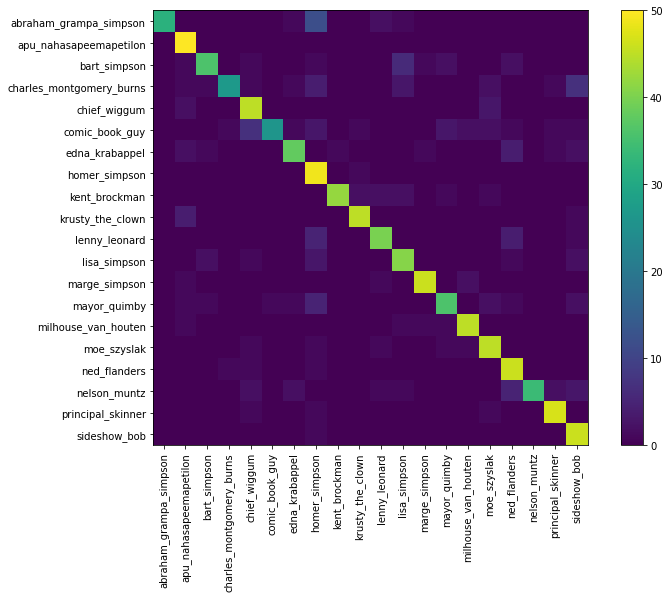

In [36]:
plt.figure(figsize=(12, 8))
plt.imshow(confusion_matrix(validation_generator.classes, y_pred), interpolation="nearest")
tick_marks = np.arange(len(classes))
plt.colorbar()
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [41]:
from tensorflow.keras.models import load_model

In [43]:
classifier = load_model("little_vgg.h5")